*Contenuti*
===
- [Scikit-learn: machine learning con Python](#Scikit-learn:-machine-learning-con-Python)
    - [Il dataset *iris*](#Il-dataset-iris)
        - [*Esercizio 1*](#Esercizio-1)
    - [Feature scaling](#Feature-scaling)
        - [*Esercizio 2*](#Esercizio-2)
    - [Insiemi di addestramento e test](#Insiemi-di-addestramento-e-test) 
    - [Un modello per la classificazione](#Un-modello-per-la-classificazione)
        - [Addestramento](#Addestramento)
        - [Predizione](#Predizione)
        - [Valutazione](#Valutazione)
    - [Dai dati alla predizione](#Dai-dati-alla-predizione)
        - [*Esercizio 3*](#Esercizio-3)        
    - [Model selection](#Model-selection)
        - [*Esercizio 4*](#Esercizio-4)
    - [Alberi di decisione](#Alberi-di-decisione)
        - [*Esercizio 5*](#Esercizio-5)

Scikit-learn: machine learning con Python
===

*Scikit-learn* (o *sklearn*) è uno dei principali strumenti Python per il machine learning, ed è la libreria open-source di data science più usata al mondo.

Sulla pagina di sklearn, http://scikit-learn.org/stable/, si trovano svariati modelli di machine learning, insieme a strumenti di preprocessing, analisi e visualizzazione dei dati. 

Ciascuna implementazione fa riferimento ad una guida utente molto dettagliata, che associa al codice la teoria necessaria per capirlo ed usarlo: http://scikit-learn.org/stable/modules/classes.html.

Oltre a permettere di *usare* il machine learning scrivendo pochissime righe di codice, la libreria è altamente modulare, e dà la possibilità agli utenti di costruire la propria implementazione basandosi su metodi, oggetti ed interfacce esistenti.

Teoria e codice sono spesso supportati da esempi pratici di utilizzo, affiancati da analisi grafiche: http://scikit-learn.org/stable/auto_examples/.

Il dataset *iris*
---

Iniziamo sfruttando i *toy dataset* messi a disposizione dalla libreria. Il modulo *datasets* ne contiene diversi.

Un *modulo* è un insieme di oggetti e funzioni con caratteristiche comuni, impacchettati insieme.

Se, dopo averlo importato, scriviamo

                datasets.
                
e premiamo il tasto di autocompletamento, possiamo dare un'occhiata a cosa c'è nel modulo.

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

Attraverso la funzione *load_iris* abbiamo caricato dentro una variabile un intero dataset. L'oggetto così creato sarà simile ad un dizionario (Lezione 5), cioè ad un insieme di coppie chiave/valore.

Dati ed etichette sono associati rispettivamente alle chiavi *data* e *target*.

In [4]:
X = iris['data']
y = iris['target']

print(X.shape, y.shape)

(150, 4) (150,)


Dentro al dizionario ci sono altri oggetti utili. Alla chiave DESCR è associata una descrizione del dataset.

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### *Esercizio 1*
Esplorare il contenuto del dataset iris. Per esempio, stampare i primi dieci esempi e la relativa etichetta.

In [4]:
#FILL ME

feature: [5.1 3.5 1.4 0.2] label: 0
feature: [4.9 3.  1.4 0.2] label: 0
feature: [4.7 3.2 1.3 0.2] label: 0
feature: [4.6 3.1 1.5 0.2] label: 0
feature: [5.  3.6 1.4 0.2] label: 0
feature: [5.4 3.9 1.7 0.4] label: 0
feature: [4.6 3.4 1.4 0.3] label: 0
feature: [5.  3.4 1.5 0.2] label: 0
feature: [4.4 2.9 1.4 0.2] label: 0
feature: [4.9 3.1 1.5 0.1] label: 0


Feature scaling
---
Come si vede dalla descrizione, le feature non sono definite sullo stesso intervallo. Per esempio, i valori minimi di *sepal_lenght* (4.3) e di *petal_width* (0.1) hanno diversi ordini di grandezza.

### *Esercizio 2*
Estrarre, per ogni feature del dataset iris, i valori minimo e massimo osservati sul training set (controllare che siano uguali a quelli della descrizione).

In [8]:
import numpy as np

#FILL ME

Tra gli strumenti di preprocessing di sklearn, troviamo alcune utilità per normalizzare i dati. Usiamo *MinMaxScaler* per scalare tutte le feature tra 0 e 1. 

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.feature_range

(0, 1)

In [10]:
X = scaler.fit_transform(X)

print(np.min(X, axis=0))
print(np.max(X, axis=0))

[0. 0. 0. 0.]
[1. 1. 1. 1.]


Insiemi di addestramento e test
---
Prima di passare all'addestramento, dividiamo i dati in training e test set. Come è stato ordinato il dataset?

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Mischiamo (coerentemente!) i dati in modo casuale con la funzione *shuffle*.

In [12]:
from sklearn.utils import shuffle#importo singola funzione dal modulo

X, y = shuffle(X, y, random_state=0)#controllo del generatore random

for i, x in enumerate(X[:10]):
    print('feature: {} label: {}'.format(x, y[i]))

feature: [0.41666667 0.33333333 0.69491525 0.95833333] label: 2
feature: [0.47222222 0.08333333 0.50847458 0.375     ] label: 1
feature: [0.33333333 0.91666667 0.06779661 0.04166667] label: 0
feature: [0.83333333 0.375      0.89830508 0.70833333] label: 2
feature: [0.19444444 0.58333333 0.08474576 0.04166667] label: 0
feature: [0.55555556 0.54166667 0.84745763 1.        ] label: 2
feature: [0.19444444 0.625      0.05084746 0.08333333] label: 0
feature: [0.66666667 0.45833333 0.62711864 0.58333333] label: 1
feature: [0.69444444 0.33333333 0.6440678  0.54166667] label: 1
feature: [0.5        0.33333333 0.50847458 0.5       ] label: 1


Prendiamo i primi due terzi dei dati mischiati (100) per l'addestramento e i restanti (50) per il test.

In [13]:
X_train = X[:100]#i primi 100 esempi (righe)
X_test = X[100:]#gli altri

print(X_train.shape, X_test.shape)

(100, 4) (50, 4)


Stesso discorso per le etichette.

In [14]:
y_train = y[:100]
y_test = y[100:]

print(y_train.shape, y_test.shape)

(100,) (50,)


Un modello per la classificazione
---
Siamo pronti per l'addestramento. Costruiamo un modello $k$*-nearest neighbors* (KNN) per la classificazione.

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN()

print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


Abbiamo invocato una funzione speciale, chiamata *costrutture*, che inizializza (in questo caso senza parametri) un classificatore KNN. Possiamo vedere

- dalla documentazione: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- posizionando il puntatore del mouse dentro le parentesi del costruttore e premendo Shift e due volte Tab
- stampando l'oggetto creato,

che questa funzione prende in ingresso diversi parametri, nessuno dei quali obbligatorio. Per esempio, il numero di vicini $k$ (chiamato *n_neighbors*) vale di default 5.

Ciascuna proprietà può essere indicata in fase di costruzione.

In [16]:
model.n_neighbors

5

In [17]:
model = KNN(n_neighbors=3)

model.n_neighbors

3

### Addestramento

Tramite la funzione *fit* addestriamo il modello sui dati di apprendimento.

In [18]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Predizione

Una volta addestrato, usiamo il modello per predire la classe degli esempi del test set.

In [19]:
predictions = model.predict(X_test)

predictions.shape

(50,)

In [20]:
predictions

array([0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0,
       0, 0, 2, 1, 2, 0])

### Valutazione

Infine, valutiamo le prestazioni del modello addestrato sull'insieme di test, confrontando le predizioni con le (vere) etichette.

In [21]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, predictions)
print('Model accuracy on test set:', acc)

Model accuracy on test set: 0.96


Dai dati alla predizione
---

Ecco tutto quello che ci serve, con sklearn, per costruire un modello di classificazione a partire da un dataset.

In [22]:
#Importo librerie
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

#Carico il dataset
iris = datasets.load_iris()
X, y = iris['data'], iris['target']

#Scalo le feature tra 0 e 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Separo train e test
X, y = shuffle(X, y, random_state=0)
X_train, X_test = X[:100], X[100:]
y_train, y_test = y[:100], y[100:]

#Addestro il modello
model = KNN(n_neighbors=3).fit(X_train, y_train)

#Ottengo predizioni e valuto l'accuratezza del modello
predictions = model.predict(X_test)
print('Model accuracy on test set:', accuracy_score(y_test, predictions))

Model accuracy on test set: 0.96


### *Esercizio 3*
Ripetere quanto visto fin qui lavorando sul dataset *boston*. Utilizzare KNN per la regressione (*KNeighborsRegressor*) e il *mean absolute error* come metrica di valutazione.

In [23]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error

boston = datasets.load_boston()

#FILL ME

Model selection
---
Torniamo alla classificazione di iris e calibriamo il valore di $k$. Abbiamo bisogno di un insieme di validazione.

In [23]:
from sklearn.neighbors import KNeighborsClassifier as KNN

#Carico il dataset
iris = datasets.load_iris()
X, y = iris['data'], iris['target']

#Scalo le feature tra 0 e 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Separo train , validation e test
X, y = shuffle(X, y, random_state=123)
X_tr, X_val, X_test = X[:75], X[75:100], X[100:]
y_tr, y_val, y_test = y[:75], y[75:100], y[100:]

print(X_tr.shape, X_val.shape, X_test.shape)

(75, 4) (25, 4) (50, 4)


Ipotizziamo dei valori per $k$ e scegliamo quello che dà un risultato migliore sull'insieme di validazione.

In [24]:
for k in [1,2,3,5,10]:
    model = KNN(n_neighbors=k)
    model.fit(X_tr, y_tr)
    predictions = model.predict(X_val)
    validation_accuracy = accuracy_score(y_val, predictions)
    print('Validation accuracy with k {}: {:.2f}'.format(k, validation_accuracy))                  

Validation accuracy with k 1: 0.92
Validation accuracy with k 2: 0.96
Validation accuracy with k 3: 0.92
Validation accuracy with k 5: 0.92
Validation accuracy with k 10: 0.92


Costruiamo un modello con il miglior $k$ e otteniamo le predizioni sul test.

In [25]:
best_model = KNN(n_neighbors=2)
best_model.fit(X_tr, y_tr)
predictions = best_model.predict(X_test)

print('Test accuracy:', accuracy_score(y_test, predictions))

Test accuracy: 0.96


**Nota**: il fatto di aver ottenuto lo stesso valore in validazione e in test è assolutamente casuale!

### *Esercizio 4*

Una volta scelto il valore dei parametri, una pratica comune è utilizzare *tutti* i dati del training set (anche quelli usati per la validazione) per un nuovo addestramento.

- ricomporre $X^{train}$ e $y^{train}$ a partire da $X^{tr}$, $X^{val}$, $y^{tr}$ e $y^{val}$ e usarli per addestrare KNN con $k=3$
- confrontare l'accuratezza con quella ottenuta qui sopra: ci abbiamo guadagnato qualcosa ad usare tutti i dati per l'addestramento finale?

### *Esercizio 5*

Ripetere la validazione di $k$ per il dataset boston. Scegliere un numero a piacere di esempi per l'addestramento, la validazione e il test.

Alberi di decisione
---
Costruiamo adesso un *albero di decisione* (DT) ed utilizziamolo per la regressione.

In [44]:
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.metrics import mean_absolute_error

model = DT(random_state=0)

print(model)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')


Notare, tra gli altri, il parametro *max_depth*: questo indica la profondità massima di espansione dell'albero in fase di addestramento.

Ripetiamo quanto fatto in precedenza utilizzando un'utilità del modulo *model_selection* per la separazione in training e test set.

In [45]:
from sklearn.model_selection import train_test_split as split#utilità di split train/test

boston = datasets.load_boston()
X, y = boston['data'], boston['target']

X_train, X_test, y_train, y_test = split(X, y, test_size=.3, random_state=0)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(506, 13)
(354, 13)
(152, 13)


In [46]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(506,)
(354,)
(152,)


In [47]:
predictions = model.fit(X_train, y_train).predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print('MAE on test set: {:.2f}'.format(mae))

MAE on test set: 3.09


Notare come tutti i modelli di sklearn espongano le stesse funzioni.

E' un buon risultato? Guardiamo che errore commette l'albero sui dati di apprendimento, e a che profondità è arrivato.

In [48]:
mean_absolute_error(y_train, model.predict(X_train))

0.0

In [49]:
model.tree_.max_depth

17

Cosa è successo? Siamo contenti? Proviamo ad impostare una profondità più bassa.

In [51]:
model.max_depth = 5

model.fit(X_train, y_train)#refit

mae_train = mean_absolute_error(y_train, model.predict(X_train))
print('MAE on training set: {:.2f}'.format(mae_train))

MAE on training set: 1.88


In [52]:
mae_test = mean_absolute_error(y_test, model.predict(X_test))
print('MAE on test set: {:.2f}'.format(mae_test))

MAE on test set: 3.02


### *Esercizio 6*

Validare la profondità massima (*max_depth*) del DT costruito nelle celle precedenti.

### *Esercizio 7*

Utilizzare un DT per la classificazione degli iris.

### *Esercizio 8*

Ripetere quanto visto finora lavorando sul dataset *digits*.

In [53]:
digits = datasets.load_digits()
x = digits['data'][0]
y = digits['target'][0]

x.shape

(64,)

In [54]:
y

0

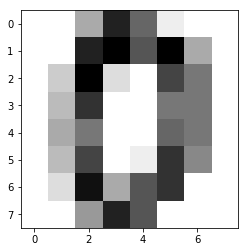

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

img = x.reshape(8,8)
plt.imshow(img, cmap=plt.cm.binary)

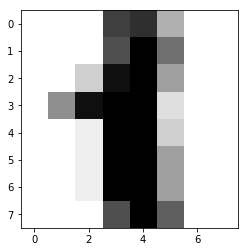

In [56]:
img = digits['data'][1].reshape(8,8)
plt.imshow(img, cmap=plt.cm.binary)

In particolare,

- scegliere un modello adatto al task (classificazione o regressione?)
- preparare i dati
- separare gli insiemi di addestramento, validazione e test
- addestrare e testare il modello.

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>